## Problem Definition and Applications

* Our problem is predicting user's activity from phone sensors data.
* Thus, we can define our problem as binary classification, where we can label each data point as walking and jogging.
* There are many application for this kind of classification in various fields such as healthcare, security intelligence etc.

## Understanding data

* This dataset includes time-series data generated by accelerometer and gyroscope sensors
* It is collected with an iPhone 6s kept in the participant's front pocket
* A total of 24 participants performed 6 activities in 15 trials in the same environment and conditions.
* The activities are divided to : downstairs, upstairs, walking, jogging, sitting, and standing.

The content of the data set is divided to two types of trails:

* Long trials: those with number 1 to 9 with around 2 to 3 minutes duration.
* Short trials: those with number 11 to 16 that are around 30 seconds to 1 minutes duration

The dataset contains time-series collected by both Accelerometer and Gyroscope

* For every trial we have a multivariate time-series
* Thus, we have time-series with a total of 12 features, 3 axis for each measurement : Attitude, Gravity, Rotation Rate and User Acceleration


### Short explanations about phone sensors

**Accelerometer:**

* Accelerometers handle axis-based motion sensing
* As the name kind of gives away, accelerometers measure acceleration
* The sensor is itself made up of other sensors, including microscopic crystal structures that become stressed due to accelerative forces
* The accelerometer then interprets the voltage coming from the crystals to figure out how a phone is moving and which direction it’s pointing in

**Gyroscope:**

* The gyroscope helps the accelerometer out with understanding how a phone is orientated
* A use case example can be playing a racing game using the phone and tilting the screen to steer
* The gyroscope rather than the accelerometer is used, because we only apply small turns to the phone and not actually moving through space.

### Explanation about the data original features:

**Attitude - roll, pitch and yaw:**

* Attitude provides information about an object's orientation with respect to the local level frame (horizontal plane) and true north
* Atitude data typically consist of three components: roll, pitch and yaw
* The attitude is measured using both the Acceelerometer and Gyroscope sensors

* The easiest way to understand what we mean by attitude is to consider a plane with three linear axis running through it:
        * Wing up/down = Roll
        * Nose up/down = Pitch
        * Nose left/right = heading (yaw/azimuth)
        
**Gravity and User Acceleration:**

* The accelerometer sensor in fact measures the sum of two acceleration vectors: gravity and user acceleration.
* User acceleration is the acceleration that the user imparts to the device
* Because the application used for these experiments is able to track a device’s attitude using both the gyroscope and the accelerometer, it can differentiate between gravity and user acceleration.
* So in our data, there two separate features - the user acceleration and gravity acceleration

**Rotation Rate:**

* Using the Gyroscope, this feature measures the rotation of the device around the x, y and z axises

### Loading the Data

* The data is divided into csv files
* Each file represents a trail performed by a specific participant, labeled with a specific action
* We would like to load the data into a single Pandas Data Frame  object with indicators for the specific participant and the action performed

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

General preprocessing parameters and paths:

In [2]:
root_path = os.path.join(os.getcwd(), '') #getting the current  working dir
subjects_info_path = os.path.join(root_path, 'data_subjects_info.csv')
data_root_path = os.path.join(root_path, 'B_DeviceMotion_data')

movement_data_index = {    "jog": [9, 16],"wlk": [ 7, 8 ,15]   }  #the file index attached with the folder
sub_cnt = 24

print(root_path)
print(subjects_info_path)
print(data_root_path)

C:\Users\Lenovo\Desktop\HAR\
C:\Users\Lenovo\Desktop\HAR\data_subjects_info.csv
C:\Users\Lenovo\Desktop\HAR\B_DeviceMotion_data


In [3]:
def load_subjects_info(path):
    sub_info = pd.read_csv(path)
    return sub_info

In [4]:
def load_single_data(path_to_file, movement_label,movement_file_index,participant_id):
    exp_df = pd.read_csv(path_to_file)
    exp_df.rename(columns = {"Unnamed: 0": "time"}, inplace=True)
    exp_df["subject"] = participant_id
    exp_df["movement"] = movement_label
    exp_df["movement_file_index"] = movement_file_index
    return exp_df 

In [5]:
def load_all_data(data_path, movement_index_dict, num_participants, flag=True):
    if flag:
        print("Data loading started")
        print(" ")
    df = None
    for mvnt in movement_index_dict.keys():
        mvnt_index = movement_index_dict[mvnt]
        if flag:
            print("reading file for action: " + mvnt)
        for i in mvnt_index:
            individual_folder_path = os.path.join(data_path, mvnt + "_" + str(i))
            if flag:
                print("current folder index is: " + str(i))
            for pt_id in range(num_participants):
                pt_id = pt_id + 1
                sub_file_path = os.path.join(individual_folder_path, "sub_" + str(pt_id) + ".csv")
                current_df = load_single_data(sub_file_path, mvnt, i, pt_id)
                #current_df = load_single_data(sub_file_path, mvnt, pt_id)
                if df is None:
                    df = current_df
                else:
                    df = df.append(current_df)
            if flag:
                print(" 24 done of current folder")
    if flag:
        print("Done")
    return df

In [6]:
def join_data(data_all_df, sub_df):
    sub_df = sub_df.set_index("code")
    df = data_all_df.join(sub_df, on="subject")
    return df

In [25]:
sd = load_subjects_info(subjects_info_path)
df = load_all_data(data_root_path, movement_data_index, sub_cnt, flag=True)

Data loading started
 
reading file for action: jog
current folder index is: 9
 24 done of current folder
current folder index is: 16
 24 done of current folder
reading file for action: wlk
current folder index is: 7
 24 done of current folder
current folder index is: 8
 24 done of current folder
current folder index is: 15
 24 done of current folder
Done


Can be done to get a overview.

In [8]:
df = join_data(df, sd)

In [9]:
df.isnull().sum()   #to check if any null entries present in data

time                   0
attitude.roll          0
attitude.pitch         0
attitude.yaw           0
gravity.x              0
gravity.y              0
gravity.z              0
rotationRate.x         0
rotationRate.y         0
rotationRate.z         0
userAcceleration.x     0
userAcceleration.y     0
userAcceleration.z     0
subject                0
movement               0
movement_file_index    0
weight                 0
height                 0
age                    0
gender                 0
dtype: int64

In [10]:
count_of_movement=df['movement'].value_counts()
percent_walk=(count_of_movement[0]/(count_of_movement[0]+count_of_movement[1]))*100
percent_jog=(count_of_movement[1]/(count_of_movement[0]+count_of_movement[1]))*100
print("Pertcentage of data accounting for walking "+str(percent_walk))
print("Pertcentage of data accounting for walking "+str(percent_jog))

Pertcentage of data accounting for walking 71.94865825599402
Pertcentage of data accounting for walking 28.05134174400599


The following bar-graph shows the distribution of data in its  respective classes which is highly unbalanced.

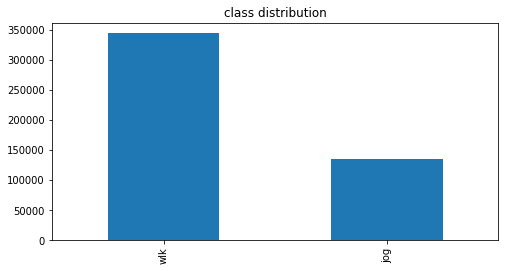

In [11]:
count_of_movement.plot(kind='bar', title='class distribution', figsize=(8,4));

## Data Exploration and Visualization

Now our data is represented as a DataFrame object, saved into the variable df
First we will take a glimpse at the columns and their types

In [64]:
df.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,subject,movement,movement_file_index
time,,,,,,,,,,,,,,,
0,3.058304,-1.227988,2.570999,0.027964,0.941814,0.334969,0.160508,-1.386834,-0.749713,0.204199,0.172657,-0.801048,1,jog,9
1,3.075964,-1.225818,2.615277,0.022178,0.941083,0.337448,-0.217198,-0.612402,-0.682841,0.089974,-0.373914,-0.506332,1,jog,9
2,3.103364,-1.235013,2.651791,0.012594,0.944152,0.329269,0.663253,-0.498534,-0.620223,0.260127,-0.364364,-0.781249,1,jog,9
3,3.109208,-1.244901,2.678484,0.010366,0.947364,0.319989,0.458100,-1.202168,-0.304561,0.584253,-0.922813,-0.285169,1,jog,9
4,3.074214,-1.263514,2.661371,0.020364,0.953159,0.301783,1.347809,-0.550578,0.610944,0.626501,-1.045978,-0.063884,1,jog,9


The next thing we want to do is to understand if and how the features change over time.
Moreover, we would like to understand how our labels (the specific  movements) are correlated to changes in our features through time

We will start with visualizing the "Attitude" features over time for different activities

In [12]:
temp_1=9     #the two variales temp_1 and temp_2 can be set  to visaulize a particular particpant data
temp_2=17 

df_sub_1 = df[df["subject"] == temp_1]

df_sub_1_jog = df_sub_1[df_sub_1["movement_file_index"] == 16]
df_sub_1_jog_att = df_sub_1_jog.iloc[:,:4]


df_sub_1_wlk = df_sub_1[df_sub_1["movement_file_index"] == 15] # choose only expirement 1 which labeled as downstairs
df_sub_1_wlk_att = df_sub_1_wlk.iloc[:,:4]


df_sub_3 = df[df["subject"] == temp_2]

df_sub_3_jog = df_sub_3[df_sub_3["movement_file_index"] == 16]
df_sub_3_jog_att = df_sub_3_jog.iloc[:,:4]

df_sub_3_wlk = df_sub_3[df_sub_3["movement_file_index"] == 15] # choose only expirement 1 which labeled as downstairs
df_sub_3_wlk_att = df_sub_3_wlk.iloc[:,:4]


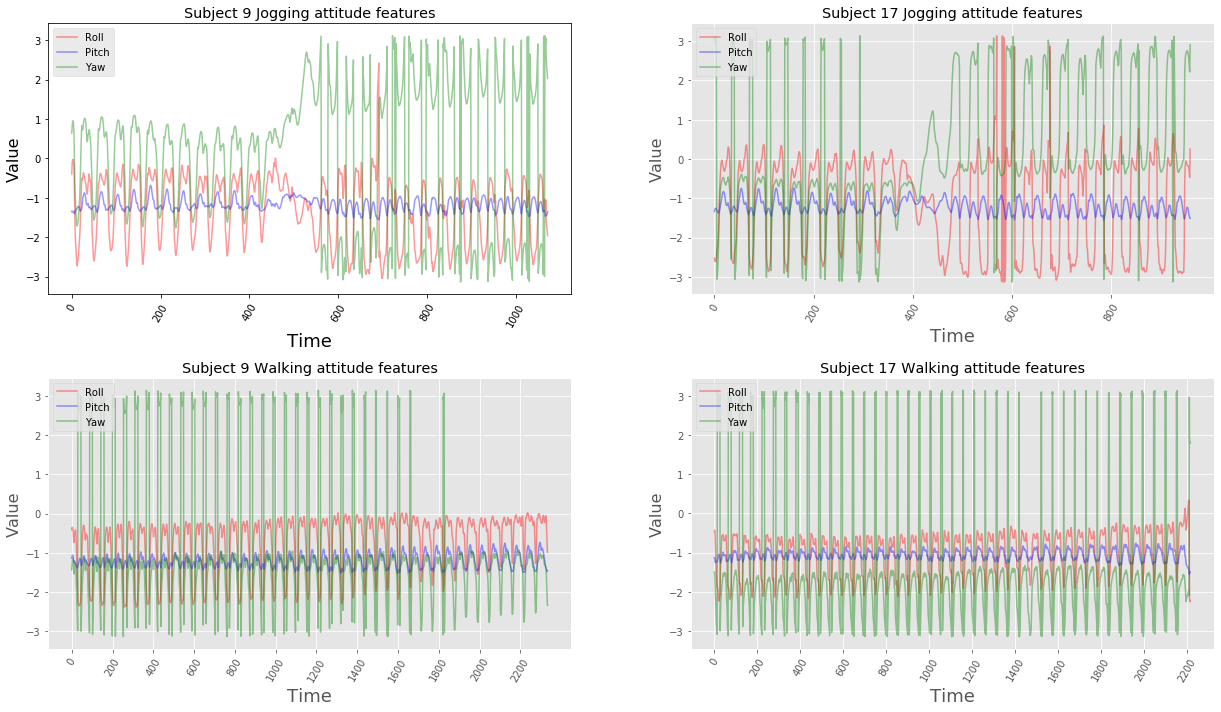

In [13]:

plt.subplot(2, 2, 1)
plt.style.use("ggplot")
plt.plot(df_sub_1_jog_att["attitude.roll"], color='red', alpha=0.4, label="Roll")
plt.plot(df_sub_1_jog_att["attitude.pitch"], color='blue', alpha=0.4, label="Pitch")
plt.plot(df_sub_1_jog_att["attitude.yaw"], color='green', alpha=0.4, label="Yaw")
axis_index = df_sub_1_jog_att["time"][::200] # show on axis every 200 recods
plt.xticks(axis_index, rotation=60)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Value', fontsize=16)
plt.title("Subject "+str(temp_1)+" Jogging attitude features")
plt.legend(loc='upper left')

plt.subplot(2, 2, 2)
plt.style.use("ggplot")
plt.plot(df_sub_3_jog_att["attitude.roll"], color='red', alpha=0.4, label="Roll")
plt.plot(df_sub_3_jog_att["attitude.pitch"], color='blue', alpha=0.4, label="Pitch")
plt.plot(df_sub_3_jog_att["attitude.yaw"], color='green', alpha=0.4, label="Yaw")
axis_index = df_sub_3_jog_att["time"][::200] # show on axis every 200 recods
plt.xticks(axis_index, rotation=60)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Value', fontsize=16)
plt.title("Subject "+str(temp_2)+" Jogging attitude features")
plt.legend(loc='upper left')

plt.subplot(2, 2, 3)
plt.style.use("ggplot")
plt.plot(df_sub_1_wlk_att["attitude.roll"], color='red', alpha=0.4, label="Roll")
plt.plot(df_sub_1_wlk_att["attitude.pitch"], color='blue', alpha=0.4, label="Pitch")
plt.plot(df_sub_1_wlk_att["attitude.yaw"], color='green', alpha=0.4, label="Yaw")
axis_index = df_sub_1_wlk_att["time"][::200] # show on axis every 200 recods
plt.xticks(axis_index, rotation=60)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Value', fontsize=16)
plt.title("Subject "+str(temp_1)+" Walking attitude features")
plt.legend(loc='upper left')

plt.subplot(2, 2, 4)
plt.style.use("ggplot")
plt.plot(df_sub_3_wlk_att["attitude.roll"], color='red', alpha=0.4, label="Roll")
plt.plot(df_sub_3_wlk_att["attitude.pitch"], color='blue', alpha=0.4, label="Pitch")
plt.plot(df_sub_3_wlk_att["attitude.yaw"], color='green', alpha=0.4, label="Yaw")
axis_index = df_sub_3_wlk_att["time"][::200] # show on axis every 200 recods
plt.xticks(axis_index, rotation=60)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Value', fontsize=16)
plt.title("Subject "+str(temp_2)+" Walking attitude features")
plt.legend(loc='upper left')

plt.tight_layout(rect=[0, 0.5, 3, 3])
plt.show()

We can see a great distinction between the attitude features values and trend between the two activities.
the Attitude Yaw and Roll features fluctuates over time when climbing upstairs but relatively stable while sitting.
Also their actual value ranges quite differently between the two activities

Next, we will try and see if we can get such a great distinction between two more related activities
We will still visualize the same Attitude features

In [14]:
df_sub_1 = df[df["subject"] == temp_1]

df_sub_1_jog = df_sub_1[df_sub_1["movement_file_index"] == 16]
df_sub_1_jog_acc = df_sub_1_jog.iloc[:,np.r_[0:1,10:13]]


df_sub_1_wlk = df_sub_1[df_sub_1["movement_file_index"] == 15] # choose only expirement 1 which labeled as downstairs
df_sub_1_wlk_acc = df_sub_1_wlk.iloc[:,np.r_[0:1,10:13]]


df_sub_3 = df[df["subject"] == temp_2]

df_sub_3_jog = df_sub_3[df_sub_3["movement_file_index"] == 16]
df_sub_3_jog_acc = df_sub_3_jog.iloc[:,np.r_[0:1,10:13]]

df_sub_3_wlk = df_sub_3[df_sub_3["movement_file_index"] == 15] # choose only expirement 1 which labeled as downstairs
df_sub_3_wlk_acc = df_sub_3_wlk.iloc[:,np.r_[0:1,10:13]]

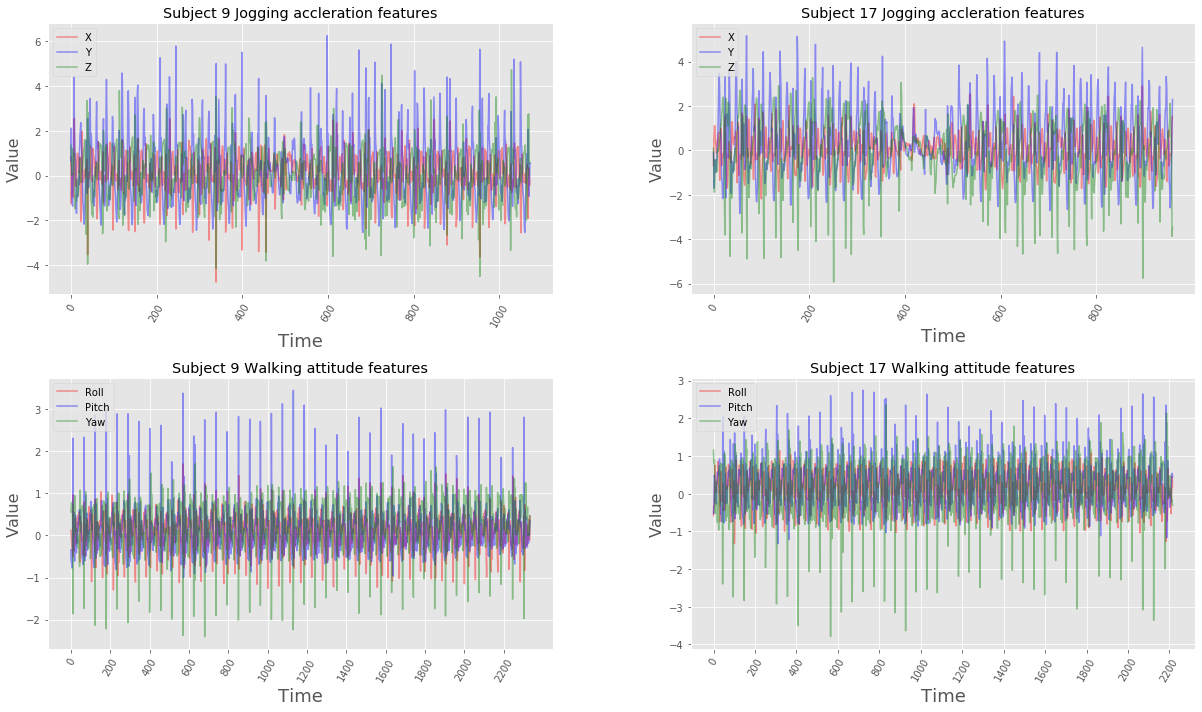

In [15]:
plt.subplot(2, 2, 1)
plt.style.use("ggplot")
plt.plot(df_sub_1_jog_acc["userAcceleration.x"], color='red', alpha=0.4, label="X")
plt.plot(df_sub_1_jog_acc["userAcceleration.y"], color='blue', alpha=0.4, label="Y")
plt.plot(df_sub_1_jog_acc["userAcceleration.z"], color='green', alpha=0.4, label="Z")
axis_index = df_sub_1_jog_acc["time"][::200] # show on axis every 200 recods
plt.xticks(axis_index, rotation=60)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Value', fontsize=16)
plt.title("Subject "+str(temp_1)+" Jogging accleration features")
plt.legend(loc='upper left')

plt.subplot(2, 2, 2)
plt.style.use("ggplot")
plt.plot(df_sub_3_jog_acc["userAcceleration.x"], color='red', alpha=0.4, label="X")
plt.plot(df_sub_3_jog_acc["userAcceleration.y"], color='blue', alpha=0.4, label="Y")
plt.plot(df_sub_3_jog_acc["userAcceleration.z"], color='green', alpha=0.4, label="Z")
axis_index = df_sub_3_jog_acc["time"][::200] # show on axis every 200 recods
plt.xticks(axis_index, rotation=60)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Value', fontsize=16)
plt.title("Subject "+str(temp_2)+" Jogging accleration features")
plt.legend(loc='upper left')

plt.subplot(2, 2, 3)
plt.style.use("ggplot")
plt.plot(df_sub_1_wlk_acc["userAcceleration.x"], color='red', alpha=0.4, label="X")
plt.plot(df_sub_1_wlk_acc["userAcceleration.y"], color='blue', alpha=0.4, label="Y")
plt.plot(df_sub_1_wlk_acc["userAcceleration.z"], color='green', alpha=0.4, label="Z")
axis_index = df_sub_1_wlk_acc["time"][::200] # show on axis every 200 recods
plt.xticks(axis_index, rotation=60)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Value', fontsize=16)
plt.title("Subject "+str(temp_1)+" Walking attitude features")
plt.legend(loc='upper left')

plt.subplot(2, 2, 4)
plt.style.use("ggplot")
plt.plot(df_sub_3_wlk_acc["userAcceleration.x"], color='red', alpha=0.4, label="X")
plt.plot(df_sub_3_wlk_acc["userAcceleration.y"], color='blue', alpha=0.4, label="Y")
plt.plot(df_sub_3_wlk_acc["userAcceleration.z"], color='green', alpha=0.4, label="Z")
axis_index = df_sub_3_wlk_acc["time"][::200] # show on axis every 200 recods
plt.xticks(axis_index, rotation=60)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Value', fontsize=16)
plt.title("Subject "+str(temp_2)+" Walking attitude features")
plt.legend(loc='upper left')


plt.tight_layout(rect=[0, 0.5, 3, 3])
plt.show()

The distinction is not as great as in the last example, but still we can see magnitude differences in the Roll feature.
Although while going downstairs the Yaw feature also fluctuates, we can still see different fluctuation trends between the two activities

### Correlation between participants

We would like to make sure that the differences in the Attitude features doesn't depend on a specific participant.
In order to do that we will perform the same analysis from above, also for participant number 6


### Visualization of changes in the Acceleration features

We will now examine changes in the Acceleration features through time between different labeled activities
We will use participant 12 and compare the activities "standing" and "walking"

In [16]:
df_sub_1 = df[df["subject"] == temp_1]

df_sub_1_jog = df_sub_1[df_sub_1["movement_file_index"] == 16]
df_sub_1_jog_rot = df_sub_1_jog.iloc[:,np.r_[0:1,7:10]]


df_sub_1_wlk = df_sub_1[df_sub_1["movement_file_index"] == 15] # choose only expirement 1 which labeled as downstairs
df_sub_1_wlk_rot = df_sub_1_wlk.iloc[:,np.r_[0:1,7:10]]


df_sub_3 = df[df["subject"] == temp_2]

df_sub_3_jog = df_sub_3[df_sub_3["movement_file_index"] == 16]
df_sub_3_jog_rot = df_sub_3_jog.iloc[:,np.r_[0:1,7:10]]

df_sub_3_wlk = df_sub_3[df_sub_3["movement_file_index"] == 15] # choose only expirement 1 which labeled as downstairs
df_sub_3_wlk_rot = df_sub_3_wlk.iloc[:,np.r_[0:1,7:10]]


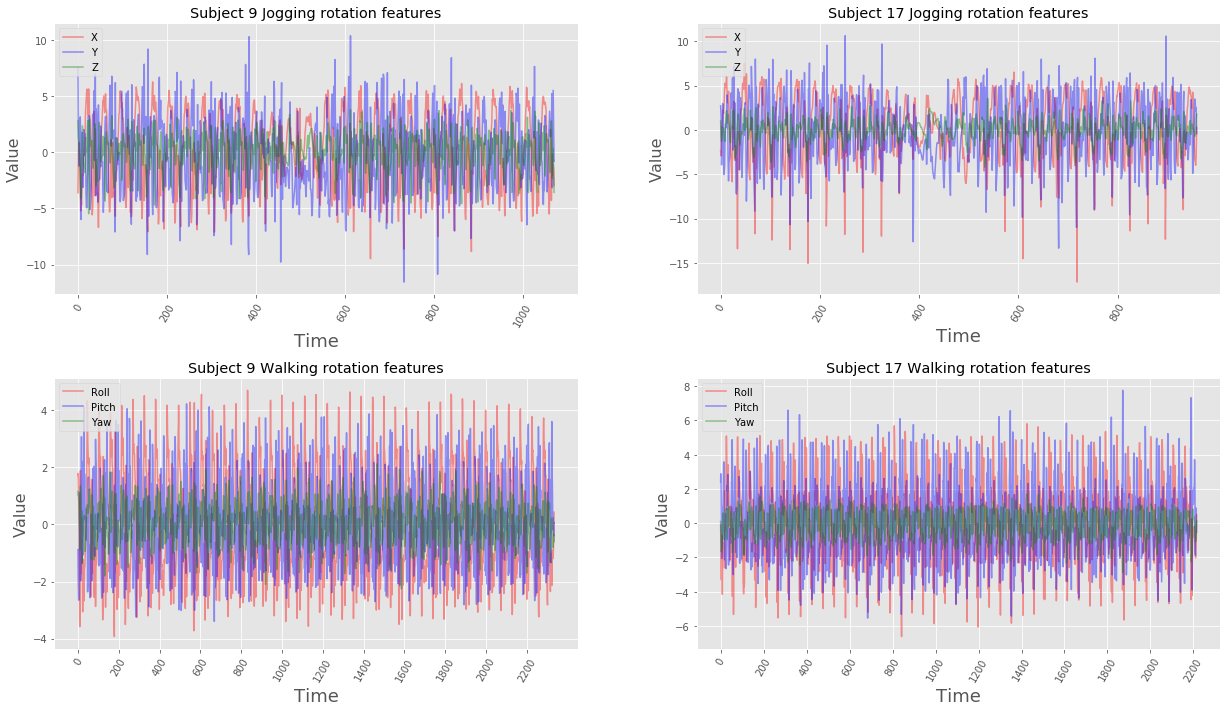

In [17]:
plt.subplot(2, 2, 1)
plt.style.use("ggplot")
plt.plot(df_sub_1_jog_rot["rotationRate.x"], color='red', alpha=0.4, label="X")
plt.plot(df_sub_1_jog_rot["rotationRate.y"], color='blue', alpha=0.4, label="Y")
plt.plot(df_sub_1_jog_rot["rotationRate.z"], color='green', alpha=0.4, label="Z")
axis_index = df_sub_1_jog_rot["time"][::200] # show on axis every 200 recods
plt.xticks(axis_index, rotation=60)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Value', fontsize=16)
plt.title("Subject "+str(temp_1)+" Jogging rotation features")
plt.legend(loc='upper left')

plt.subplot(2, 2, 2)
plt.style.use("ggplot")
plt.plot(df_sub_3_jog_rot["rotationRate.x"], color='red', alpha=0.4, label="X")
plt.plot(df_sub_3_jog_rot["rotationRate.y"], color='blue', alpha=0.4, label="Y")
plt.plot(df_sub_3_jog_rot["rotationRate.z"], color='green', alpha=0.4, label="Z")
axis_index = df_sub_3_jog_rot["time"][::200] # show on axis every 200 recods
plt.xticks(axis_index, rotation=60)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Value', fontsize=16)
plt.title("Subject "+str(temp_2)+" Jogging rotation features")
plt.legend(loc='upper left')

plt.subplot(2, 2, 3)
plt.style.use("ggplot")
plt.plot(df_sub_1_wlk_rot["rotationRate.x"], color='red', alpha=0.4, label="X")
plt.plot(df_sub_1_wlk_rot["rotationRate.y"], color='blue', alpha=0.4, label="Y")
plt.plot(df_sub_1_wlk_rot["rotationRate.z"], color='green', alpha=0.4, label="Z")
axis_index = df_sub_1_wlk_rot["time"][::200] # show on axis every 200 recods
plt.xticks(axis_index, rotation=60)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Value', fontsize=16)
plt.title("Subject "+str(temp_1)+" Walking rotation features")
plt.legend(loc='upper left')

plt.subplot(2, 2, 4)
plt.style.use("ggplot")
plt.plot(df_sub_3_wlk_rot["rotationRate.x"], color='red', alpha=0.4, label="X")
plt.plot(df_sub_3_wlk_rot["rotationRate.y"], color='blue', alpha=0.4, label="Y")
plt.plot(df_sub_3_wlk_rot["rotationRate.z"], color='green', alpha=0.4, label="Z")
axis_index = df_sub_3_wlk_rot["time"][::200] # show on axis every 200 recods
plt.xticks(axis_index, rotation=60)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Value', fontsize=16)
plt.title("Subject "+str(temp_2)+" Walking rotation features")
plt.legend(loc='upper left')


plt.tight_layout(rect=[0, 0.5, 3, 3])
plt.show()

As we might expected, we can see a great distinction between these two activities -
especially in the magnitude of all the features and on the y-axis magnitude and fluctuation

## Feature Extraction / Engineering

Our data is a time series - a sequence of measurements over time


* Thus, extracting value for a single data point depends on it's context
* But, classic ML algorithms/classifiers predicts output for a single input data point - independent to adjacent input data point
* So, in order to use our data to train classic ML model we will have to encode our features to represent context data

### Sliding Window Features

* In this method, we will encode each data sample as a concatenation of analytical functions calculated over a predefined size of previous samples
* For example, here we will use a context size of 10 (calculate over 10 pervious data points)

In [ ]:
class SlidingWindow:
    
    def __init__(self, orig_df, window_size, num_experiments, num_participants, exclude, fnlist):
        exps = [i for i in range(1,num_experiments + 1) if i != exclude]
        parts = [i for i in range(1,num_participants + 1)]
        smp_df = self.create_sliding_df(orig_df, window_size, fnlist, exps, parts)
        self.window_size = window_size
        self.df = smp_df

    def create_sld_df_single_exp(self, orig_df, window_size, analytic_functions_list):
        dfs_to_concate = []
        base_df = orig_df.drop('movement', axis=1)
        for func in analytic_functions_list:
            method_to_call = getattr(base_df.rolling(window=window_size), func)
            analytic_df = method_to_call()
            analytic_df = analytic_df[window_size:]
            analytic_df.columns = [col + "_sld_" + func for col in analytic_df.columns]
            dfs_to_concate.append(analytic_df)

        action_df = orig_df[['movement']][window_size:] # [[]] syntax to return DataFrame and not Series
        dfs_to_concate.append(action_df)
        return pd.concat(dfs_to_concate,axis=1)

    def create_sliding_df(self, orig_df, window_size, analytic_functions_list, expirements, participants):
        dfs_to_concate = []
        cols_to_drop = ['subject', 'movement_file_index']
        for e in expirements:
            for p in participants:
                exp_df = orig_df[(orig_df['subject'] == p) & (orig_df['movement_file_index'] == e)]
                exp_df = exp_df.drop(cols_to_drop, axis=1)
                exp_roll_df = self.create_sld_df_single_exp(exp_df, window_size, analytic_functions_list)

                dfs_to_concate.append(exp_roll_df)
        return pd.concat(dfs_to_concate, axis=0, ignore_index=True)

In [30]:
df = df.set_index('time')
df.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,subject,movement,movement_file_index
time,,,,,,,,,,,,,,,
0,3.058304,-1.227988,2.570999,0.027964,0.941814,0.334969,0.160508,-1.386834,-0.749713,0.204199,0.172657,-0.801048,1,jog,9
1,3.075964,-1.225818,2.615277,0.022178,0.941083,0.337448,-0.217198,-0.612402,-0.682841,0.089974,-0.373914,-0.506332,1,jog,9
2,3.103364,-1.235013,2.651791,0.012594,0.944152,0.329269,0.663253,-0.498534,-0.620223,0.260127,-0.364364,-0.781249,1,jog,9
3,3.109208,-1.244901,2.678484,0.010366,0.947364,0.319989,0.458100,-1.202168,-0.304561,0.584253,-0.922813,-0.285169,1,jog,9
4,3.074214,-1.263514,2.661371,0.020364,0.953159,0.301783,1.347809,-0.550578,0.610944,0.626501,-1.045978,-0.063884,1,jog,9


In [47]:
# defining variables for the sliding window data frame creation
num_experiments = 16
num_participants = 24
exclude = 10
analytic_functions_list = ['mean', 'min', 'max', 'std']
WINDOW_SIZE = 10

# create the sliding window data frame
win_df = SlidingWindow(df, WINDOW_SIZE, num_experiments, num_participants, exclude, analytic_functions_list)

In [32]:
win_df.df.head(5)

,attitude.roll_sld_mean,attitude.pitch_sld_mean,attitude.yaw_sld_mean,gravity.x_sld_mean,gravity.y_sld_mean,gravity.z_sld_mean,rotationRate.x_sld_mean,rotationRate.y_sld_mean,rotationRate.z_sld_mean,userAcceleration.x_sld_mean,...,gravity.x_sld_std,gravity.y_sld_std,gravity.z_sld_std,rotationRate.x_sld_std,rotationRate.y_sld_std,rotationRate.z_sld_std,userAcceleration.x_sld_std,userAcceleration.y_sld_std,userAcceleration.z_sld_std,movement
0,-2.138438,-1.323737,-2.916099,-0.198170,0.967553,0.137543,-0.965172,-0.690017,-0.735564,0.041152,...,0.038303,0.017568,0.067111,0.224648,0.651212,0.306443,0.135143,0.139484,0.094473,wlk
1,-2.187843,-1.300553,-2.954971,-0.211632,0.961327,0.158906,-1.014856,-0.490350,-0.781032,0.016985,...,0.043680,0.020414,0.064290,0.171389,0.365493,0.314811,0.081132,0.167116,0.101204,wlk
2,-2.227747,-1.276174,-2.987131,-0.225652,0.954294,0.180202,-1.013120,-0.397759,-0.813827,0.035142,...,0.048115,0.023153,0.061142,0.172418,0.201949,0.299446,0.127033,0.212091,0.100855,wlk
3,-2.256729,-1.251434,-3.009008,-0.240035,0.946738,0.200464,-0.945266,-0.370112,-0.833364,0.073359,...,0.050427,0.025179,0.057988,0.178347,0.199007,0.270530,0.167867,0.243913,0.160766,wlk
4,-2.274777,-1.227659,-3.021522,-0.254499,0.939150,0.218477,-0.845058,-0.243264,-0.806975,0.116742,...,0.050320,0.025897,0.053880,0.240941,0.426960,0.325031,0.189852,0.255946,0.169024,wlk


* There are 15 experiments and 24 participants for each expirement
* For sliding window of 10 samples we are loosing 10 data samples of each experiment
* This sums up to 15 * 24 * 10 = 3600
* Indeed in the new data set there are exactly 3600 rows fewer than the origial data set
* Furthermore, the new data set has exactly 12 * {num_analytical_function} + label column = 12 * 4 + 1 = 49 columns
(12 is the number of features in the original data set)

### ML Models - Training and Statistical Evaluation

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

class DataProcessingEval():
    
    def __init__(self, origin_df, labels_dict):
        self.labels_dict = labels_dict
        self.classes_names = self.create_classes(labels_dict)
        self.df = origin_df
    
    def create_samples(self, division_ratio=[0.7, 0.1, 0.2]): #0.7, 0.1, 0.2
        # Define X, y
        df = self.df.sample(frac=1).reset_index(drop=True)
        X, y = df.drop(["movement"], axis=1), df["movement"]
        y = y.replace(self.labels_dict)

        # Divide to training, validation and test set
        train_ratio, dev_ratio = division_ratio[0], division_ratio[1]
        num_training = int(df.shape[0] * train_ratio)
        num_validation = int(df.shape[0] * dev_ratio)

        X_train, y_train = X[:num_training], y[:num_training]
        X_vald, y_vald = X[num_training:num_training + num_validation], y[num_training:num_training + num_validation]
        X_test, y_test = X[num_training + num_validation:], y[num_training + num_validation:]

        return X_train, y_train, X_vald, y_vald, X_test, y_test

    def create_classes(self, labels_dict):
        classes_indexs = labels_dict.items()
        classes_indexs = sorted(classes_indexs, key=lambda x: x[1])
        classes_names = [label for label, index in classes_indexs]
        return classes_names

    def evaluate_results(self, y_true, y_pred):
            print("---- Printing classification report ----")
            print(classification_report(y_true, y_pred, target_names=self.classes_names))

In [120]:
df.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,movement,weight,height,age,gender
0,3.058304,-1.227988,2.570999,0.027964,0.941814,0.334969,0.160508,-1.386834,-0.749713,0.204199,0.172657,-0.801048,jog,102,188,46,1
1,3.075964,-1.225818,2.615277,0.022178,0.941083,0.337448,-0.217198,-0.612402,-0.682841,0.089974,-0.373914,-0.506332,jog,102,188,46,1
2,3.103364,-1.235013,2.651791,0.012594,0.944152,0.329269,0.663253,-0.498534,-0.620223,0.260127,-0.364364,-0.781249,jog,102,188,46,1
3,3.109208,-1.244901,2.678484,0.010366,0.947364,0.319989,0.458100,-1.202168,-0.304561,0.584253,-0.922813,-0.285169,jog,102,188,46,1
4,3.074214,-1.263514,2.661371,0.020364,0.953159,0.301783,1.347809,-0.550578,0.610944,0.626501,-1.045978,-0.063884,jog,102,188,46,1


In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print(X_vald.shape,y_vald.shape)

In [48]:
labels = {'wlk': 0, "jog": 1}

process = DataProcessingEval(win_df.df, labels_dict=labels)
X_train, y_train, X_vald, y_vald, X_test, y_test = process.create_samples()

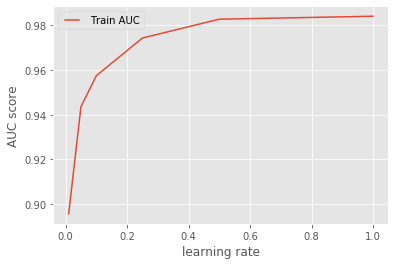

In [54]:
from sklearn.metrics import roc_curve, auc
from matplotlib.legend_handler import HandlerLine2D
from sklearn.ensemble import GradientBoostingClassifier

learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []

for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(X_train, y_train)   
   train_pred = model.predict(X_train)   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)   
    

line1, = plt.plot(learning_rates, train_results,  label='Train AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

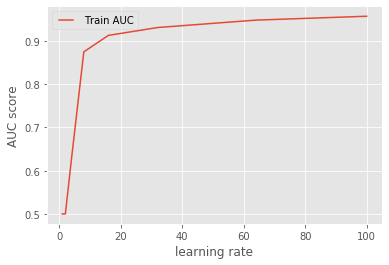

In [68]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100]
train_results = []

for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=estimator)
   model.fit(X_train, y_train)   
   train_pred = model.predict(X_train)   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)   
    
line1, = plt.plot(n_estimators, train_results,  label='Train AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()


In [69]:
reg=GradientBoostingClassifier(learning_rate=0.1, n_estimators=25,max_depth=3, min_samples_split=4, min_samples_leaf=1, subsample=0.8)
reg.fit(X_train, y_train)
reg_prediction = reg.predict(X_test)
print(classification_report(y_test,reg_prediction))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     68694
           1       0.92      0.88      0.90     26771

    accuracy                           0.94     95465
   macro avg       0.94      0.92      0.93     95465
weighted avg       0.94      0.94      0.94     95465



In [53]:
print(confusion_matrix(y_test,reg_prediction))

[[68063   631]
 [ 1570 25201]]
